<a href="https://colab.research.google.com/github/winsignares/analitica/blob/main/articuloanalisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Alistamos nuestra herram

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


###cargamos la base de datos desde google drive


In [5]:
from google.colab import files
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###accedemos a la ruta del excel

In [6]:
df = pd.read_excel('/content/drive/MyDrive/2023/delincuencia.xls')
df.shape

(31764, 10)

In [7]:
NewMes = []
for item in df.MES:
  if item == 'ene':
    NewMes.append(1)
  elif item == 'feb':
    NewMes.append(2)
  elif item == 'mar':
    NewMes.append(3)
  elif item == 'abr':
    NewMes.append(4)
  elif item == 'may':
    NewMes.append(5)
  elif item == 'jun':
    NewMes.append(6)
  elif item == 'jul':
    NewMes.append(7)
  elif item == 'ago':
    NewMes.append(8)
  elif item == 'sep':
    NewMes.append(9)
  elif item == 'oct':
    NewMes.append(10)
  elif item == 'nov':
    NewMes.append(11)
  elif item == 'dic':
    NewMes.append(12)
  else:
    NewMes.append(0)
 
    

df['NewMes'] = NewMes
df

,MUNICIPIO_HECHO,AÑO,MES,INTERVALOS_HORA,DIA_SEMANA,BARRIOS_HECHO,DESCRIPCION_CONDUCTA,ARMAS_MEDIOS,MODALIDAD,Hurto Personas/ HechosDEL 01/01/2018 AL 27/12/2022,NewMes
0,BARRANQUILLA (CT),2021,ene,12:00 - 17:59,Miércoles,1 DE MAYO,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,ATRACO,1,1
1,BARRANQUILLA (CT),2021,ene,06:00 - 11:59,Lunes,7 DE ABRIL,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,ATRACO,1,1
2,BARRANQUILLA (CT),2021,feb,18:00 - 23:59,Sábado,7 DE ABRIL,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,ATRACO,1,2
3,BARRANQUILLA (CT),2021,may,00:00 - 05:59,Miércoles,7 DE ABRIL,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,ATRACO,1,5
4,BARRANQUILLA (CT),2021,may,18:00 - 23:59,Miércoles,7 DE ABRIL,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,ATRACO,1,5
...,...,...,...,...,...,...,...,...,...,...,...
31759,BARRANQUILLA (CT),2019,nov,18:00 - 23:59,Miércoles,VILLA SAN PEDRO III,ARTÍCULO 239. HURTO PERSONAS,SIN EMPLEO DE ARMAS,ATRACO,1,11
31760,BARRANQUILLA (CT),2019,ene,06:00 - 11:59,Miércoles,VILLA SANTOS,ARTÍCULO 239. HURTO PERSONAS,SIN EMPLEO DE ARMAS,ATRACO,1,1
31761,BARRANQUILLA (CT),2019,sep,18:00 - 23:59,Jueves,VILLA SANTOS,ARTÍCULO 239. HURTO PERSONAS,SIN EMPLEO DE ARMAS,ATRACO,1,9
31762,BARRANQUILLA (CT),2019,ene,18:00 - 23:59,Miércoles,VISTA HERMOSA,ARTÍCULO 239. HURTO PERSONAS,SIN EMPLEO DE ARMAS,ATRACO,1,1


###dividimos el dataframe por segmentos

In [8]:
df_2018 = df[df['AÑO']=="2018"]
df_2019 = df[df['AÑO']=="2019"].sort_values('NewMes')
df_2020 = df[df['AÑO']=="2020"].sort_values('NewMes')
df_2021 = df[df['AÑO']=="2021"].sort_values('NewMes')
df_2022 = df[df['AÑO']=="2022"].sort_values('NewMes')
#organizamos por mes enero hasta diciembre
df_2018 = df_2018.sort_values('NewMes')
df_2019 = df_2019.sort_values('NewMes')
df_2020 = df_2020.sort_values('NewMes')
df_2021 = df_2021.sort_values('NewMes')
df_2022 = df_2022.sort_values('NewMes')

In [9]:
def cantidadMes(mes, dataf):
  i=0
  for item in dataf.NewMes:
    if item == mes:
      i=i+1
  return i

def DicionarioMes(meses,dataf):
  dicionario = {}
  for mes in meses:
    dicionario[mes] = cantidadMes(mes,dataf)
  return dicionario

### sacamos la suma de los datos según los Meses

In [10]:
SUMADF2018 = df_2018.groupby('NewMes').count()
SUMADF2018 = SUMADF2018['Hurto Personas/ HechosDEL 01/01/2018 AL 27/12/2022']

SUMADF2019 = df_2019.groupby('NewMes').count()
SUMADF2019 = SUMADF2019['Hurto Personas/ HechosDEL 01/01/2018 AL 27/12/2022']

SUMADF2020 = df_2020.groupby('NewMes').count()
SUMADF2020 = SUMADF2020['Hurto Personas/ HechosDEL 01/01/2018 AL 27/12/2022']

SUMADF2021 = df_2021.groupby('NewMes').count()
SUMADF2021 = SUMADF2021['Hurto Personas/ HechosDEL 01/01/2018 AL 27/12/2022']

SUMADF2022 = df_2022.groupby('NewMes').count()
SUMADF2022 = SUMADF2022['Hurto Personas/ HechosDEL 01/01/2018 AL 27/12/2022']


In [11]:
SumMes2018 = DicionarioMes(df_2018.NewMes, df_2018)
SumMes2018

{1: 370,
 2: 450,
 3: 436,
 4: 482,
 5: 525,
 6: 468,
 7: 488,
 8: 467,
 9: 440,
 10: 540,
 11: 567,
 12: 516}

### Graficamos para el analisis de los diferentes años

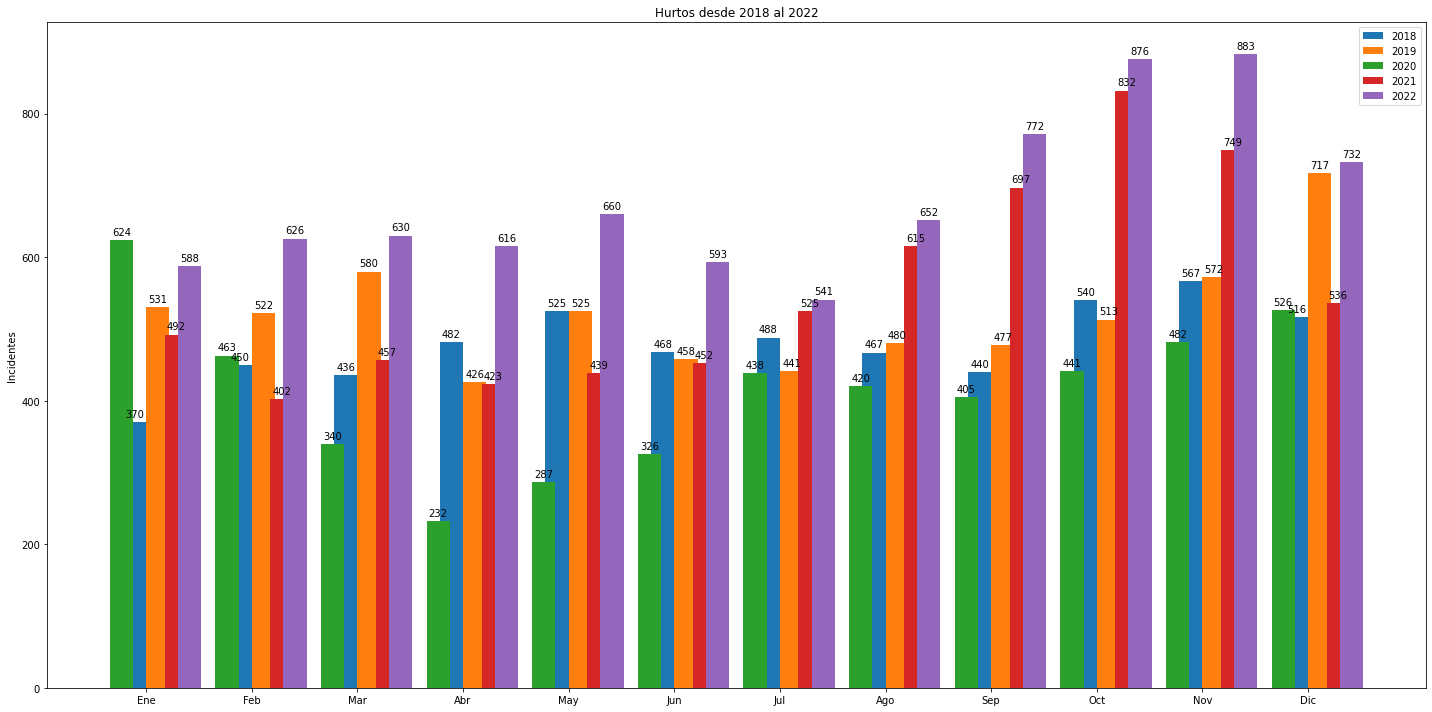

In [12]:

labels = ['Ene', 'Feb', 'Mar', 'Abr', 'May','Jun', 'Jul', 'Ago', 'Sep','Oct','Nov','Dic']
ListDF2018 = list(SUMADF2018)
ListDF2019 = list(SUMADF2019)
ListDF2020 = list(SUMADF2020)
ListDF2021 = list(SUMADF2021)
ListDF2022 = list(SUMADF2022)

x = np.arange(len(labels))  # the label locations
width = 0.22  # the width of the bars

fig, ax = plt.subplots( figsize=(20,10))
rects1 = ax.bar(x - width/2, ListDF2018, width, label='2018')
rects2 = ax.bar(x + width/2, ListDF2019, width, label='2019')
rects3 = ax.bar(x - (width+0.25)/2, ListDF2020, width, label='2020')
rects4 = ax.bar(x + (width+0.35)/2, ListDF2021, width, label='2021')
rects5 = ax.bar(x + (width+0.60)/2, ListDF2022, width, label='2022')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Incidentes')
ax.set_title('Hurtos desde 2018 al 2022')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.show()

###Obtenemos la cantidad de incidentes por barrios

In [13]:
SUMADF2018XBARRIOS = df_2018.groupby('BARRIOS_HECHO').sum()
SUMADF2018XBARRIOS 

,Hurto Personas/ HechosDEL 01/01/2018 AL 27/12/2022,NewMes
BARRIOS_HECHO,,
1 DE MAYO,3,24
20 DE JULIO,46,341
7 DE ABRIL,100,649
7 DE AGOSTO,12,64
ABAJO,48,253
...,...,...
VILLA SANTOS,31,186
VILLANUEVA,12,83
VILLAS DE LA CORDIALIDAD,7,41


###creamos función para conocer la cantidad exacta de incidentes

In [14]:
import operator

def cantidad(barrio, dataf):
  i=0
  for item in dataf.BARRIOS_HECHO:
    if item == barrio:
      i=i+1
  return i


def ordanardic(dicold):
  newDic = {}
  dfdic_sort = sorted(dicold.items(), key=operator.itemgetter(1), reverse=True)
  for name in enumerate(dfdic_sort):
    newDic[name[1][0]] = dicold[name[1][0]]
  return newDic

def Dicionario(barrios,dataf):
  dicionario = {}
  for barrio in barrios:
    dicionario[barrio] = cantidad(barrio,dataf)
  return dicionario

In [15]:
barriounico2018 = df_2018.drop_duplicates(subset=['BARRIOS_HECHO'])
barrios2018 = list(barriounico2018.BARRIOS_HECHO)
Dicionariobarrios2018 = Dicionario(barrios2018, df_2018)

barriounico2019 = df_2019.drop_duplicates(subset=['BARRIOS_HECHO'])
barrios2019 = list(barriounico2019.BARRIOS_HECHO)
Dicionariobarrios2019 = Dicionario(barrios2019,df_2019)

barriounico2020 = df_2020.drop_duplicates(subset=['BARRIOS_HECHO'])
barrios2020 = list(barriounico2020.BARRIOS_HECHO)
Dicionariobarrios2020 = Dicionario(barrios2020,df_2020)

barriounico2021 = df_2021.drop_duplicates(subset=['BARRIOS_HECHO'])
barrios2021 = list(barriounico2021.BARRIOS_HECHO)
Dicionariobarrios2021 = Dicionario(barrios2021,df_2021)

barriounico2022 = df_2022.drop_duplicates(subset=['BARRIOS_HECHO'])
barrios2022 = list(barriounico2022.BARRIOS_HECHO)
Dicionariobarrios2022 = Dicionario(barrios2022,df_2022)


###Organizamos el dicionario de mayor a menor

In [16]:
dicionario2018_sort = ordanardic(Dicionariobarrios2018)
dicionario2019_sort = ordanardic(Dicionariobarrios2019)
dicionario2020_sort = ordanardic(Dicionariobarrios2020)
dicionario2021_sort = ordanardic(Dicionariobarrios2021)
dicionario2022_sort = ordanardic(Dicionariobarrios2022)
#dicionario2022_sort


dfd2018 = pd.DataFrame([[key, dicionario2018_sort[key]] for key in dicionario2018_sort.keys()], columns=['Barrio', 'Caso'])
dfd2019 = pd.DataFrame([[key, dicionario2019_sort[key]] for key in dicionario2019_sort.keys()], columns=['Barrio', 'Caso'])
dfd2020 = pd.DataFrame([[key, dicionario2020_sort[key]] for key in dicionario2020_sort.keys()], columns=['Barrio', 'Caso'])
dfd2021 = pd.DataFrame([[key, dicionario2021_sort[key]] for key in dicionario2021_sort.keys()], columns=['Barrio', 'Caso'])
dfd2022 = pd.DataFrame([[key, dicionario2022_sort[key]] for key in dicionario2022_sort.keys()], columns=['Barrio', 'Caso'])
#dfd2020.head()


dfd2022

,Barrio,Caso
0,CENTRO,235
1,CIUDADELA 20 DE JULIO,210
2,REBOLO,190
3,7 DE ABRIL,169
4,SIMON BOLIVAR,149
...,...,...
235,LA ARBOLEDA,1
236,CIUDAD CARIBE II,1
237,PRIMERO DE MAYO,1
238,BARRIO ABAJO,1


###Frecuencia de barrios del 2018 al 2022 con mas registro
1. CENTRO
2. CIUDADELA 20 DE JULIO
3. REBOLO
4. EL BOSQUE
5. SIMON BOLIVAR


In [17]:
ListaBarriosultimoanios = ["CENTRO", "CIUDADELA 20 DE JULIO", "REBOLO", "EL BOSQUE", "SIMON BOLIVAR", "MONTES"]
d2018_barrios = {}
d2019_barrios = {}
d2020_barrios = {}
d2021_barrios = {}
d2022_barrios = {}

l2018barrios = []
l2019barrios = []
l2020barrios = []
l2021barrios = []
l2022barrios = []

for item in ListaBarriosultimoanios:
  d2018_barrios[item]=cantidad(item, df_2018)
  l2018barrios.append(cantidad(item, df_2018))

for item in ListaBarriosultimoanios:
  d2019_barrios[item]=cantidad(item, df_2019)
  l2019barrios.append(cantidad(item, df_2019))

for item in ListaBarriosultimoanios:
  d2020_barrios[item]=cantidad(item, df_2020)
  l2020barrios.append(cantidad(item, df_2020))

for item in ListaBarriosultimoanios:
  d2021_barrios[item]=cantidad(item, df_2021)
  l2021barrios.append(cantidad(item, df_2021))

for item in ListaBarriosultimoanios:
  d2022_barrios[item]=cantidad(item, df_2022)
  l2022barrios.append(cantidad(item, df_2022))


dfNew2018 = pd.DataFrame([[key, dicionario2018_sort[key]] for key in d2018_barrios.keys()], columns=['Barrio', 'Caso'])
dfNew2019 = pd.DataFrame([[key, dicionario2018_sort[key]] for key in d2019_barrios.keys()], columns=['Barrio', 'Caso'])
dfNew2020 = pd.DataFrame([[key, dicionario2018_sort[key]] for key in d2020_barrios.keys()], columns=['Barrio', 'Caso'])
dfNew2021 = pd.DataFrame([[key, dicionario2018_sort[key]] for key in d2021_barrios.keys()], columns=['Barrio', 'Caso'])
dfNew2022 = pd.DataFrame([[key, dicionario2018_sort[key]] for key in d2022_barrios.keys()], columns=['Barrio', 'Caso'])


l2022barrios


[235, 210, 190, 143, 149, 94]

###sacamos graficos de los primeros 5 barrios con mayor casos y con mayor frecuencia en los periodods de tiempos

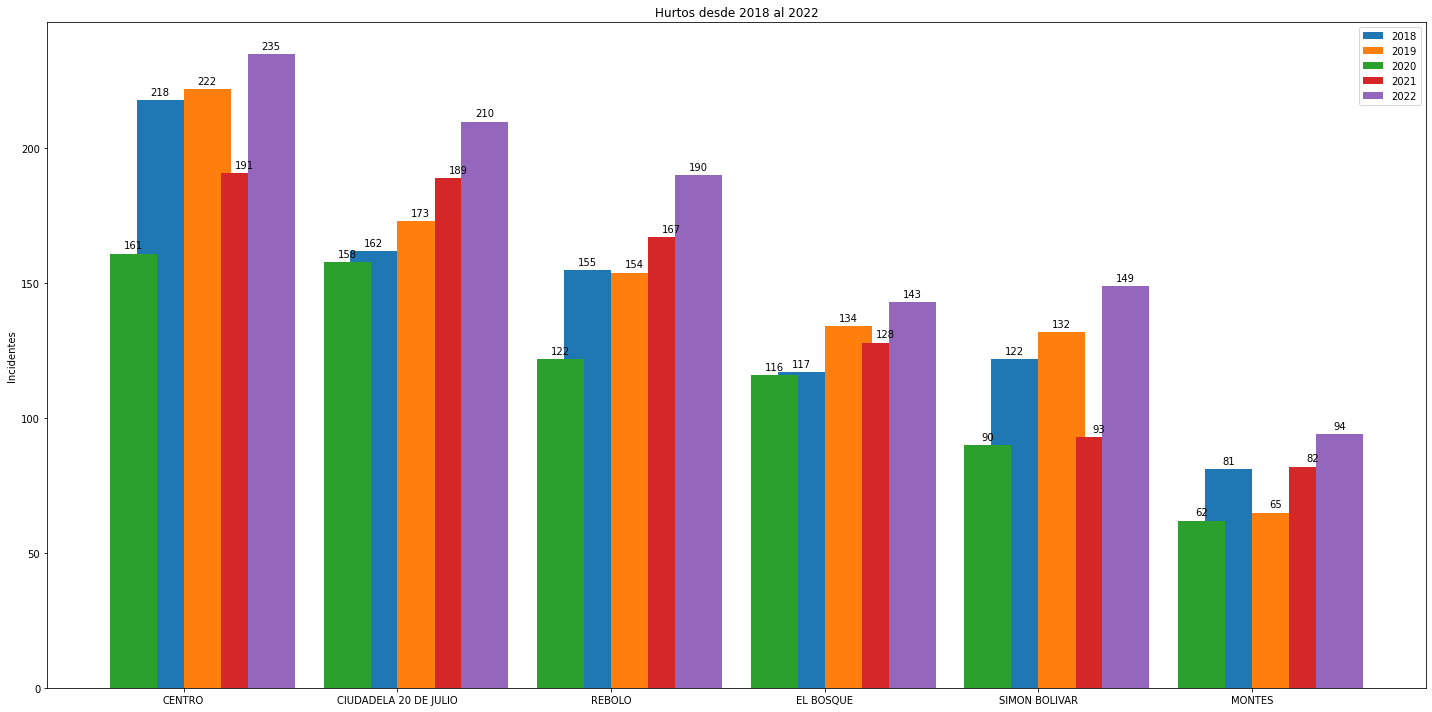

In [37]:
ListDF2018 = list(SUMADF2018)
ListDF2019 = list(SUMADF2019)
ListDF2020 = list(SUMADF2020)
ListDF2021 = list(SUMADF2021)
ListDF2022 = list(d2022_barrios)

x = np.arange(len(ListaBarriosultimoanios))  # the label locations
width = 0.22  # the width of the bars

fig, ax = plt.subplots( figsize=(20,10))
rects1 = ax.bar(x - width/2, l2018barrios, width, label='2018')
rects2 = ax.bar(x + width/2, l2019barrios, width, label='2019')
rects3 = ax.bar(x - (width+0.25)/2, l2020barrios, width, label='2020')
rects4 = ax.bar(x + (width+0.35)/2, l2021barrios, width, label='2021')
rects5 = ax.bar(x + (width+0.60)/2, l2022barrios, width, label='2022')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Incidentes')
ax.set_title('Hurtos desde 2018 al 2022')
ax.set_xticks(x)
ax.set_xticklabels(ListaBarriosultimoanios)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.show()

###Sacamos las diferentes ['ARMAS_MEDIOS'] y realizamos el grafico correspondiente hay 1 sola modalidad que es Atraco

In [38]:
ARMAS_MEDIOS = df.drop_duplicates(subset=['ARMAS_MEDIOS'])
ARMAS_MEDIOS['ARMAS_MEDIOS']

0        ARMA BLANCA / CORTOPUNZANTE
920                    ARMA DE FUEGO
6260                    CONTUNDENTES
6327                    ESCOPOLAMINA
6334             SIN EMPLEO DE ARMAS
6612                             NaN
31763                          TOTAL
Name: ARMAS_MEDIOS, dtype: object

In [46]:
ListaAmas_Medios = ['ARMA DE FUEGO','CONTUNDENTES','ESCOPOLAMINA','SIN EMPLEO DE ARMAS']


ARMAS_MEDIOS= df.groupby('ARMAS_MEDIOS').sum()
ARMAS_MEDIOS['Hurto Personas/ HechosDEL 01/01/2018 AL 27/12/2022']

ARMAS_MEDIOS
ARMA BLANCA / CORTOPUNZANTE     6619
ARMA DE FUEGO                  27258
CONTUNDENTES                     414
ESCOPOLAMINA                      71
SIN EMPLEO DE ARMAS             1297
TOTAL                          35700
Name: Hurto Personas/ HechosDEL 01/01/2018 AL 27/12/2022, dtype: int64

In [47]:
def contarArmasMedio(df, concepto):
  contar=0
  for item in df.ARMAS_MEDIOS:
    if concepto == item:
      contar= contar +1
  return contar

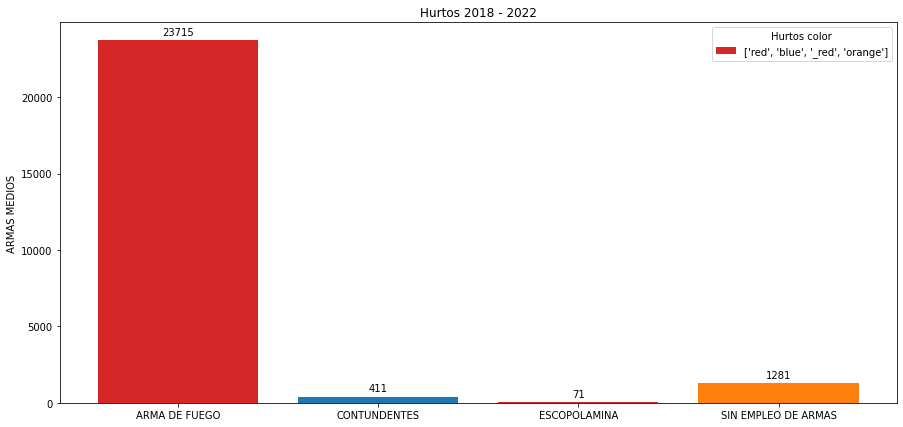

In [60]:

lArmas = []
c=0
for item in ListaAmas_Medios:
  c= contarArmasMedio(df, item)
  lArmas.append(c)

lArmas


fig, ax = plt.subplots(figsize=(15,7))


bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

rects1 =ax.bar(ListaAmas_Medios, lArmas, label=bar_labels, color=bar_colors)

ax.set_ylabel('ARMAS MEDIOS')
ax.set_title('Hurtos 2018 - 2022')
ax.legend(title='Hurtos color')

autolabel(rects1)

plt.show()
